In [145]:
# Import dependencies and setup
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as matplotlib
import matplotlib.dates as matplotlibdates
from matplotlib.dates import date2num
import datetime
import dataframe_image as dfi

import warnings
warnings.filterwarnings('ignore')

In [49]:
# Read csv files and store as DataFrames

seq_water_path = "Resources/dam_levels/seq_water_grid.csv"
seq_water_df = pd.read_csv(seq_water_path)

alderley_rainfall_path = "Resources/rainfall/alderley_rainfall.csv"
alderley_df = pd.read_csv(alderley_rainfall_path)

dam_locations_path = "Resources/dam_locations.csv"
dam_locations_df = pd.read_csv(dam_locations_path)

seq_water_df

,Name,Date,Last Observation (%),Last Observation (ML)
0,SEQ Water Grid,04/03/2017,70.9,1562083.85
1,SEQ Water Grid,05/03/2017,70.9,1562306.15
2,SEQ Water Grid,06/03/2017,70.8,1560544.56
3,SEQ Water Grid,07/03/2017,70.7,1557157.48
4,SEQ Water Grid,08/03/2017,70.6,1554735.70
...,...,...,...,...
1822,SEQ Water Grid,28/02/2022,96.8,2132800.79
1823,SEQ Water Grid,01/03/2022,96.8,2131911.57
1824,SEQ Water Grid,02/03/2022,93.0,2048657.55
1825,SEQ Water Grid,03/03/2022,94.0,2069539.68


In [50]:
# Convert 'Date' columns in all .csvs to datetime

seq_water_df['Date'] = pd.to_datetime(seq_water_df['Date'], format="%d/%m/%Y")
seq_water_df.dtypes

Name                             object
Date                     datetime64[ns]
Last Observation (%)            float64
Last Observation (ML)           float64
dtype: object

In [51]:
# # Group by month, calculate monthly totals and averages, add to DataFrame

# month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
#                'July', 'August', 'September', 'October', 'November', 'December']

# seq_water_monthly_df = seq_water_df.groupby(pd.Grouper(key='Date', freq='1M')).sum()
# seq_water_monthly_df.index = seq_water_monthly_df.index.strftime('%B')
# seq_water_monthly_df = seq_water_monthly_df.groupby(['Date']).sum().reset_index()
# seq_water_monthly_df['Date'] = pd.Categorical(seq_water_monthly_df['Date'], month_order)
# seq_water_monthly_df = seq_water_monthly_df.sort_values('Date')

# seq_water_monthly_df

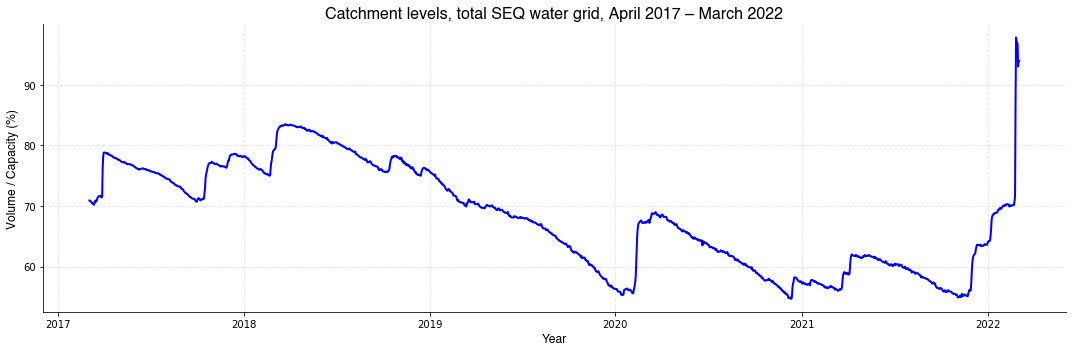

In [88]:
# Plot - SEQ Water Grid, Catchment levels (Volume/Capacity)

# Font families
font_1 = {'family':'helvetica','color':'black','size':16}
font_2 = {'family':'helvetica','color':'black','size':12}

plt.figure(figsize=(15,5))
plt.plot(seq_water_df['Date'], seq_water_df['Last Observation (%)'], color="blue", markersize='7', 
         linewidth=2)

plt.title('Catchment levels, total SEQ water grid, April 2017 – March 2022', fontdict = font_1)
plt.xlabel('Year', fontdict = font_2)
plt.ylabel('Volume / Capacity (%)', fontdict = font_2)

# Aesthetics

matplotlib.pyplot.grid(visible=True, which='both', axis='both', 
                       color='blue', alpha=0.1, dash_capstyle='butt', dash_joinstyle='bevel', 
                       linestyle='--', linewidth=1)
            
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()

# Show/save
plt.savefig("/Users/minoperic/Data Analytics/Data Investigations/seq-dam-levels/Images/seq_catchment_levels.png", 
            transparent=False, dpi=300)
plt.show()

In [53]:
# Preview SEQ rainfall DataFrame

alderley_df

,year,month,day,amount_mm
0,1899,1,1,NaN
1,1899,1,2,NaN
2,1899,1,3,NaN
3,1899,1,4,NaN
4,1899,1,5,NaN
...,...,...,...,...
44983,2022,2,28,344.8
44984,2022,3,1,2.8
44985,2022,3,2,0.0
44986,2022,3,3,26.0


In [96]:
# Drop NaN value rows

filtered_alderley_df = alderley_df[alderley_df['amount_mm'].notnull()]
filtered_alderley_df

,year,month,day,amount_mm
196,1899,7,16,0.0
197,1899,7,17,2.5
198,1899,7,18,0.0
199,1899,7,19,0.0
200,1899,7,20,0.0
...,...,...,...,...
44983,2022,2,28,344.8
44984,2022,3,1,2.8
44985,2022,3,2,0.0
44986,2022,3,3,26.0


In [99]:
# Convert filtered_alderley_df to datetime

filtered_alderley_df['date'] = pd.to_datetime(filtered_alderley_df[['year', 'month', 'day']])
filtered_alderley_df.dtypes

year                  int64
month                 int64
day                   int64
amount_mm           float64
date         datetime64[ns]
dtype: object

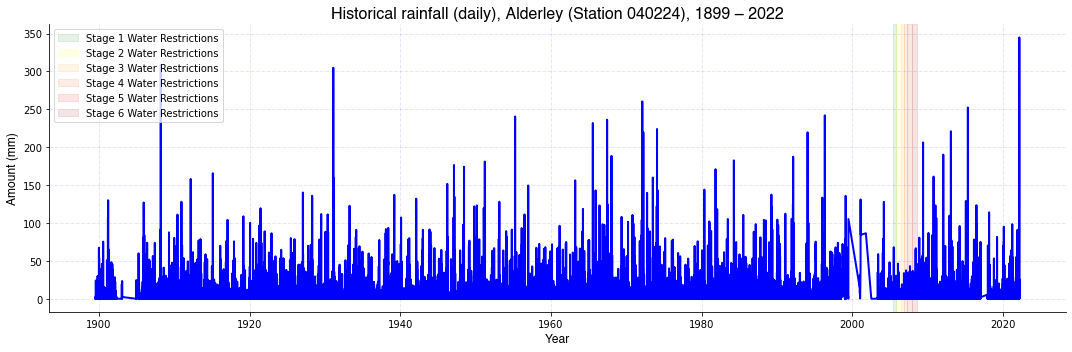

In [118]:
# Plot - Historical rainfall

# Font families
font_1 = {'family':'helvetica','color':'black','size':16}
font_2 = {'family':'helvetica','color':'black','size':12}

plt.figure(figsize=(15,5))
plt.plot(filtered_alderley_df['date'], filtered_alderley_df['amount_mm'], color="blue", markersize='7', 
         linewidth=2)

plt.title('Historical rainfall (daily), Alderley (Station 040224), 1899 – 2022', fontdict = font_1)
plt.xlabel('Year', fontdict = font_2)
plt.ylabel('Amount (mm)', fontdict = font_2)

# Aesthetics

matplotlib.pyplot.grid(visible=True, which='both', axis='both', 
                       color='blue', alpha=0.1, dash_capstyle='butt', dash_joinstyle='bevel', 
                       linestyle='--', linewidth=1)

# Highlights
plt.axvspan(date2num(datetime.datetime(2005,5,13)), date2num(datetime.datetime(2005,10,3)), 
           label="Stage 1 Water Restrictions", color="green", alpha=0.1)
plt.axvspan(date2num(datetime.datetime(2005,10,3)), date2num(datetime.datetime(2006,6,13)), 
           label="Stage 2 Water Restrictions", color="yellow", alpha=0.1)
plt.axvspan(date2num(datetime.datetime(2006,6,13)), date2num(datetime.datetime(2006,11,1)), 
           label="Stage 3 Water Restrictions", color="orange", alpha=0.1)
plt.axvspan(date2num(datetime.datetime(2006,11,1)), date2num(datetime.datetime(2007,4,10)), 
           label="Stage 4 Water Restrictions", color="orangered", alpha=0.1)
plt.axvspan(date2num(datetime.datetime(2007,4,10)), date2num(datetime.datetime(2007,11,23)), 
           label="Stage 5 Water Restrictions", color="red", alpha=0.1)
plt.axvspan(date2num(datetime.datetime(2007,11,23)), date2num(datetime.datetime(2008,7,21)), 
           label="Stage 6 Water Restrictions", color="darkred", alpha=0.1)

plt.legend()

#plt.xticks((filtered_alderley_df['year'])[::1000], rotation=25)
               
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()

# Show/save
plt.savefig("/Users/minoperic/Data Analytics/Data Investigations/seq-dam-levels/Images/alderley_historical.png", 
            transparent=False, dpi=300)
plt.show()

In [101]:
# Calculate cumulative rainfall

filtered_alderley_df['cumulative mm'] = filtered_alderley_df['amount_mm'].cumsum()
filtered_alderley_df

,year,month,day,amount_mm,date,cumulative mm
196,1899,7,16,0.0,1899-07-16,0.0
197,1899,7,17,2.5,1899-07-17,2.5
198,1899,7,18,0.0,1899-07-18,2.5
199,1899,7,19,0.0,1899-07-19,2.5
200,1899,7,20,0.0,1899-07-20,2.5
...,...,...,...,...,...,...
44983,2022,2,28,344.8,2022-02-28,133819.6
44984,2022,3,1,2.8,2022-03-01,133822.4
44985,2022,3,2,0.0,2022-03-02,133822.4
44986,2022,3,3,26.0,2022-03-03,133848.4


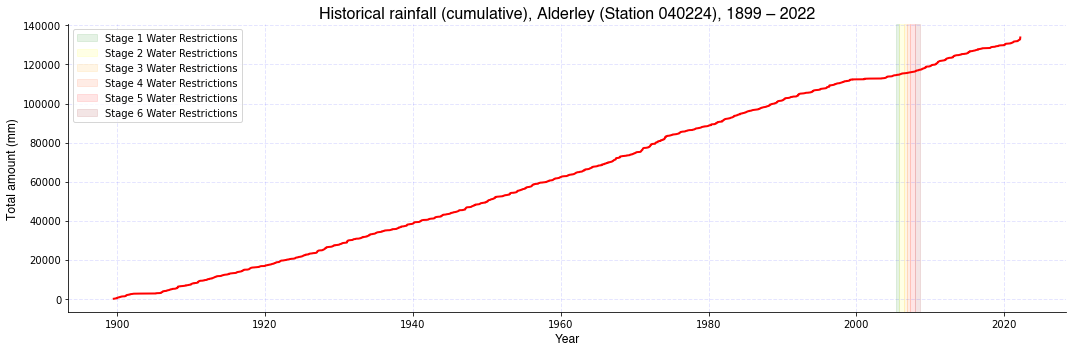

In [119]:
# Plot - Historical rainfall (cumulative)

# Font families
font_1 = {'family':'helvetica','color':'black','size':16}
font_2 = {'family':'helvetica','color':'black','size':12}

plt.figure(figsize=(15,5))
plt.plot(filtered_alderley_df['date'], filtered_alderley_df['cumulative mm'], color="red", markersize='7', 
         linewidth=2)

plt.title('Historical rainfall (cumulative), Alderley (Station 040224), 1899 – 2022', fontdict = font_1)
plt.xlabel('Year', fontdict = font_2)
plt.ylabel('Total amount (mm)', fontdict = font_2)

# Highlights
plt.axvspan(date2num(datetime.datetime(2005,5,13)), date2num(datetime.datetime(2005,10,3)), 
           label="Stage 1 Water Restrictions", color="green", alpha=0.1)
plt.axvspan(date2num(datetime.datetime(2005,10,3)), date2num(datetime.datetime(2006,6,13)), 
           label="Stage 2 Water Restrictions", color="yellow", alpha=0.1)
plt.axvspan(date2num(datetime.datetime(2006,6,13)), date2num(datetime.datetime(2006,11,1)), 
           label="Stage 3 Water Restrictions", color="orange", alpha=0.1)
plt.axvspan(date2num(datetime.datetime(2006,11,1)), date2num(datetime.datetime(2007,4,10)), 
           label="Stage 4 Water Restrictions", color="orangered", alpha=0.1)
plt.axvspan(date2num(datetime.datetime(2007,4,10)), date2num(datetime.datetime(2007,11,23)), 
           label="Stage 5 Water Restrictions", color="red", alpha=0.1)
plt.axvspan(date2num(datetime.datetime(2007,11,23)), date2num(datetime.datetime(2008,7,21)), 
           label="Stage 6 Water Restrictions", color="darkred", alpha=0.1)

plt.legend()

# Aesthetics
matplotlib.pyplot.grid(visible=True, which='both', axis='both', 
                       color='blue', alpha=0.1, dash_capstyle='butt', dash_joinstyle='bevel', 
                       linestyle='--', linewidth=1)
               
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()

# Show/save
plt.savefig("/Users/minoperic/Data Analytics/Data Investigations/seq-dam-levels/Images/alderley_cumulative.png", 
            transparent=False, dpi=300)
plt.show()

In [147]:
# Group DataFrame by months

january = filtered_alderley_df.loc[filtered_alderley_df['month'] == 1]
february = filtered_alderley_df.loc[filtered_alderley_df['month'] == 2]
march = filtered_alderley_df.loc[filtered_alderley_df['month'] == 3]
april = filtered_alderley_df.loc[filtered_alderley_df['month'] == 4]
may = filtered_alderley_df.loc[filtered_alderley_df['month'] == 5]
june = filtered_alderley_df.loc[filtered_alderley_df['month'] == 6]
july = filtered_alderley_df.loc[filtered_alderley_df['month'] == 7]
august = filtered_alderley_df.loc[filtered_alderley_df['month'] == 8]
september = filtered_alderley_df.loc[filtered_alderley_df['month'] == 9]
october = filtered_alderley_df.loc[filtered_alderley_df['month'] == 10]
november = filtered_alderley_df.loc[filtered_alderley_df['month'] == 11]
december = filtered_alderley_df.loc[filtered_alderley_df['month'] == 12]

january_total = january['amount_mm'].sum()
february_total = february['amount_mm'].sum()
march_total = march['amount_mm'].sum()
april_total = april['amount_mm'].sum()
may_total = may['amount_mm'].sum()
june_total = june['amount_mm'].sum()
july_total = july['amount_mm'].sum()
august_total = august['amount_mm'].sum()
september_total = september['amount_mm'].sum()
october_total = october['amount_mm'].sum()
november_total = november['amount_mm'].sum()
december_total = december['amount_mm'].sum()

alderley_monthly = {'Month': ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
                             'September', 'October', 'November', 'December'], 
                    'Total Amount (mm)': [january_total, february_total, march_total, april_total, may_total,
                                       june_total, july_total, august_total, september_total, october_total,
                                       november_total, december_total]}
alderley_monthly_df = pd.DataFrame(alderley_monthly) 
dfi.export(alderley_monthly_df,"alderley_monthly_df.png")
alderley_monthly_df

,Month,Total Amount (mm)
0,January,19089.4
1,February,20266.3
2,March,16365.4
3,April,10270.9
4,May,9418.9
5,June,7927.8
6,July,5667.9
7,August,4151.6
8,September,4592.1
9,October,9571.4


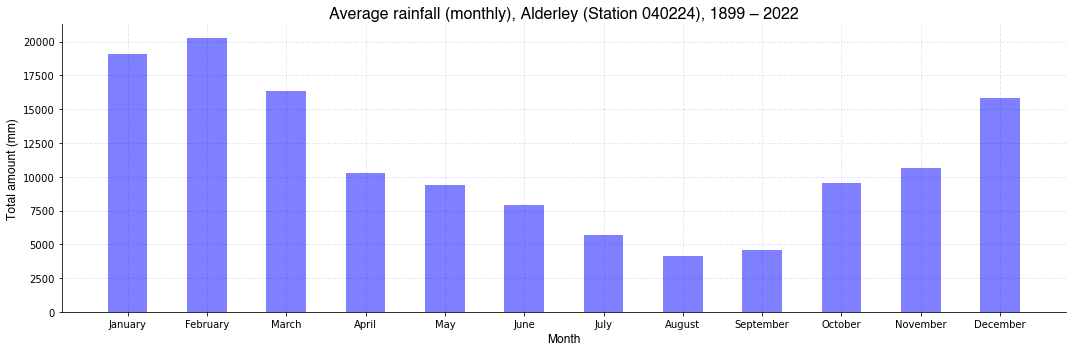

In [144]:
# Plot - Monthly rainfall

# Font families
font_1 = {'family':'helvetica','color':'black','size':16}
font_2 = {'family':'helvetica','color':'black','size':12}

plt.figure(figsize=(15,5))
plt.bar(alderley_monthly_df['Month'], alderley_monthly_df['Total Amount (mm)'], color="blue", width=0.5, alpha=0.5)

plt.title('Average rainfall (monthly), Alderley (Station 040224), 1899 – 2022', fontdict = font_1)
plt.xlabel('Month', fontdict = font_2)
plt.ylabel('Total amount (mm)', fontdict = font_2)

# Value labels
for i, v in enumerate(alderley_monthly_df['Total Amount (mm)']):
    ax.text(v + 3, i + .25, str(v), color='blue', fontweight='bold')

# Aesthetics
matplotlib.pyplot.grid(visible=True, which='both', axis='both', 
                       color='blue', alpha=0.1, dash_capstyle='butt', dash_joinstyle='bevel', 
                       linestyle='--', linewidth=1)
               
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()

# Show/save
#plt.savefig("/Users/minoperic/Data Analytics/Data Investigations/seq-dam-levels/Images/alderley_cumulative.png", 
            #transparent=False, dpi=300)
plt.show()